In [1]:
# !pip install streamlit

In [2]:
# !pip install neattext

In [1]:
import streamlit
import neattext.functions as nfc
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split



In [4]:
folder=r'C:\Users\User\Downloads'

In [5]:
df=pd.read_csv(f'{folder}\Emotions.csv')

In [6]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
2117,1957474522,worry,Memphis just can't catch a break these days. M...
2118,1957474620,neutral,@lorrainelock they are having a closing down s...
2119,1957474784,sadness,I'm sleepy but is feeling under the weather! u...
2120,1957475168,worry,5500 words and counting. My hands hurt


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [8]:
df.groupby(['sentiment'])['sentiment'].count()

sentiment
anger           7
boredom        15
empty          45
enthusiasm     26
fun            37
happiness      70
hate          119
love           70
neutral       442
relief         37
sadness       483
surprise      120
worry         651
Name: sentiment, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='count'>

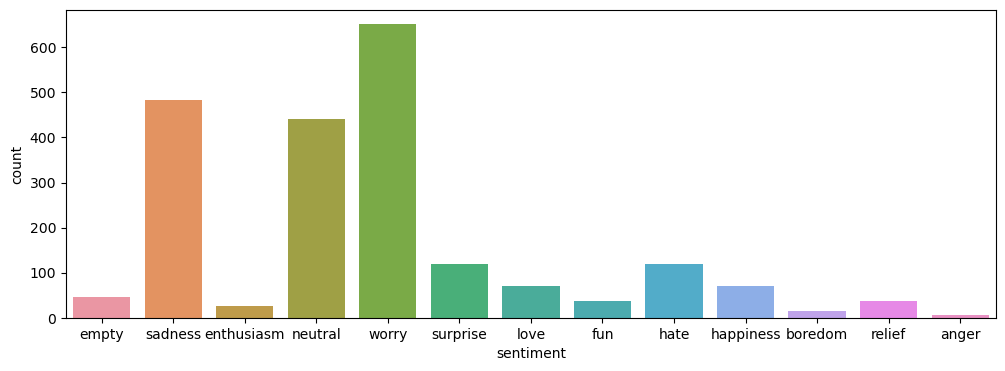

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x='sentiment',data=df)

In [11]:
dir(nfc)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
df['updated_content']=df['content'].apply(nfc.remove_userhandles)

In [13]:
df['updated_content']=df['updated_content'].apply(nfc.remove_stopwords)
df['updated_content']=df['updated_content'].apply(nfc.remove_special_characters)

In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Lable_sentiment']=LE.fit_transform(df['sentiment'])

In [15]:
df

,tweet_id,sentiment,content,updated_content,Lable_sentiment
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freakin,2
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call,10
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday,10
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON,3
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade Houston tickets will,8
...,...,...,...,...,...
2117,1957474522,worry,Memphis just can't catch a break these days. M...,Memphis cant catch break days poor Tigers,12
2118,1957474620,neutral,@lorrainelock they are having a closing down s...,closing sale look good,8
2119,1957474784,sadness,I'm sleepy but is feeling under the weather! u...,Im sleepy feeling weather ugh damn tonsils nee...,10
2120,1957475168,worry,5500 words and counting. My hands hurt,5500 words counting hands hurt,12


In [16]:
x=df['updated_content']
y=df['sentiment']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [22]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
pipe.score(xtest,ytest)

0.3458823529411765

In [24]:
new_texts ='"I am happy today",'

In [25]:
new_texts

'"I am happy today",'

In [26]:
pipe.predict([new_texts])

array(['worry'], dtype=object)

In [27]:
#Used to save the algortham and predict using that|

In [33]:
import joblib
pipeline_file=open("model_selection_updated.pkl","wb")
joblib.dump(pipe,pipeline_file)
pipeline_file.close()

In [29]:
 # !streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS

In [30]:
# !streamlit run Streamlit_creation.py

In [7]:
import site
import sys
sys.path

['C:\\Users\\User',
 'C:\\ProgramData\\anaconda3\\python311.zip',
 'C:\\ProgramData\\anaconda3\\DLLs',
 'C:\\ProgramData\\anaconda3\\Lib',
 'C:\\ProgramData\\anaconda3',
 '',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin']